<a href="https://colab.research.google.com/github/salehafzoon/Advanced_Algorithms/blob/master/PCA_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA & SVD practice


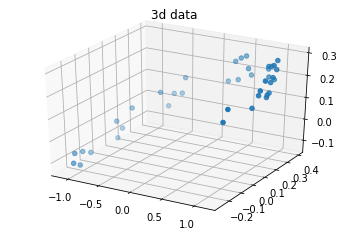

In [ ]:
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

m = 40
w1 = 0.1
w2 = 0.3
noise = 0.1
ang = np.random.rand(m) * 3 * np.pi/2 - 0.5

x = np.empty((m,3))

x[:, 0] = np.cos(ang) + np.sin(ang) /2 + noise * np.random.random(m)/2
x[:, 1] = 0.7 * np.sin(ang) /2 + noise * np.random.random(m)/2
x[:, 2] = w1 * x[:, 0] + w2 * x[:, 1] + noise * np.random.random(m)

x_centered = x - x.mean(axis = 0)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x[:,0] , x[:,1], x[:, 2])
ax.set_title('3d data');
plt.show()

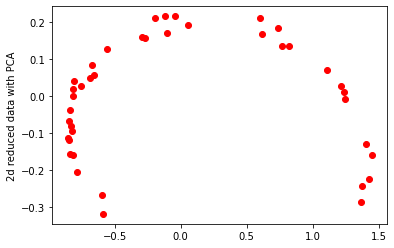

In [ ]:
def PCA_reduction(X):
  # Data matrix X, assumes 0-centered
  n, m = X.shape
  assert np.allclose(X.mean(axis=0), np.zeros(m))
  # Compute covariance matrix
  C = np.dot(X.T, X) / (n-1)
  # Eigen decomposition
  eigen_vals, eigen_vecs = np.linalg.eig(C)
  # Project X onto PC space
  X_pca = np.dot(X, eigen_vecs)
  return X_pca

x_pca = PCA_reduction(x_centered)

plt.scatter(x_pca[:,0] , x_pca[:,1], color = 'red')
plt.ylabel('2d reduced data with PCA')
plt.show()

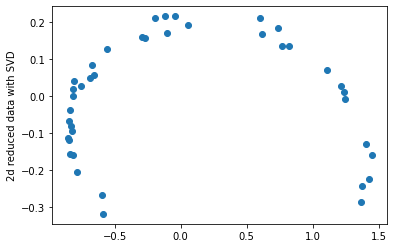

In [ ]:
def SVD_reduction(X):
  # ye svd mizanim
  u, s, vt = np.linalg.svd(x_centered)
  # columns of vt are eighen vectors of covariance matrix (decreasing variance order)
  c1 = vt.T[:,0]
  c2 = vt.T[:,1]
  # defining transformation matrix
  w = np.empty((3,2))
  w[:, 0] = c1
  w[:, 1] = c2
  return x_centered.dot(w)

x_svd = SVD_reduction(x_centered)

plt.clf()
plt.scatter(x_svd[:,0] , x_svd[:,1])
plt.ylabel('2d reduced data with SVD')
plt.show()

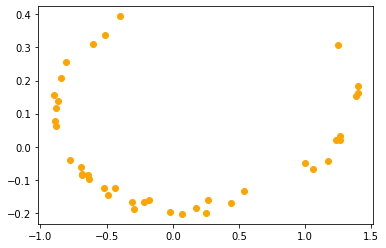

In [ ]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

pca = PCA(n_components= 2)
x2d = pca.fit_transform(x)

plt.scatter(x2d[:,0] , x2d[:,1], color = 'orange')
plt.show()

In [ ]:
x3d_inv = pca.inverse_transform(x2d)

loss = np.mean(np.sum(np.square(x - x3d_inv), axis = 1))
print("pca information loss:",loss)


pca information loss: 0.0008399947874515968


data label(target):  9


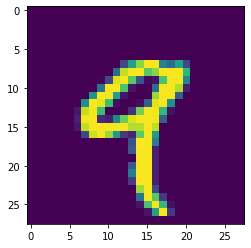

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)

ind = 4
print("data label(target): ",mnist.target[ind])

plt.imshow(mnist.data[ind].reshape(28,28))
plt.show()

train len: 52500 	,test len: 17500


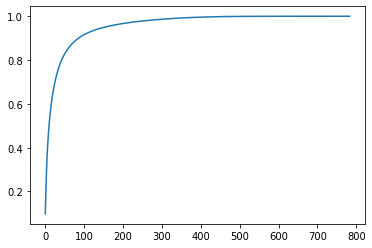


components number: 154

pca returned components number: 154
pca variance ratio 0.9504157386058368


In [ ]:
from sklearn.model_selection import train_test_split

mnist.target = mnist.target.astype(np.uint8)

x = mnist.data
y = mnist.target

x_train, x_test, y_train, y_test = train_test_split(x,y)
print("train len:",len(x_train) , "\t,test len:",len(x_test))

pca = PCA()
pca.fit(x_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.show()

# component number with respect to preseving 0.95 of data informations
d = np.argmax(cumsum >= 0.95) + 1

print("\ncomponents number:",d)

pca = PCA(n_components= 0.95)
x_reduced = pca.fit_transform(x_train)
print("\npca returned components number:",pca.n_components_)
print("pca variance ratio",np.sum(pca.explained_variance_ratio_))

# LDA practice

In [ ]:
from sklearn.datasets import make_classification 
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# creating sample data
x, y = make_classification(n_samples= 1000, n_features= 20 , n_informative= 15,
                           n_redundant= 5, random_state= 10, n_classes= 10)
print("data shape:", x.shape)

# creating our pipline
steps = [('lda',LinearDiscriminantAnalysis(n_components=9)),
         ('n', GaussianNB())]

model = Pipeline(steps = steps)

# going to split data inot 10 groups and calculating our accuracy

cv = RepeatedStratifiedKFold(n_splits= 10, n_repeats=3, random_state=10)
n_score = cross_val_score(model, x, y, scoring='accuracy', cv= cv)

print("accuracy mean: ", np.mean(n_score))

# standard deviation
print("accuracy variance: ",np.std(n_score))

data shape: (1000, 20)
accuracy mean:  0.38633333333333325
accuracy variance:  0.04362593520169192


In [ ]:
clf = SVC(kernel="poly")
clf.fit(x,y)
n_score = cross_val_score(clf, x, y, scoring='accuracy', cv= cv)

print("accuracy mean: ", np.mean(n_score))
print("accuracy variance: ",np.std(n_score))

accuracy mean:  0.4386666666666667
accuracy variance:  0.042168972268982585


In [ ]:
# comparing LDA & PCA

from sklearn import datasets
iris = datasets.load_iris()

print(iris.data.shape)
print(iris.feature_names)

print("labels: ",np.unique(iris.target))
print(iris.target_names)

pca = PCA(n_components=2)
x_2d_pca = pca.fit_transform(iris.data)

# need labels too
lda = LinearDiscriminantAnalysis(n_components=2)
x_2d_lda = lda.fit_transform(iris.data, iris.target)

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
labels:  [0 1 2]
['setosa' 'versicolor' 'virginica']


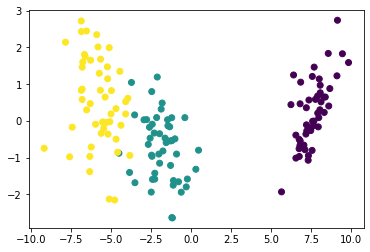

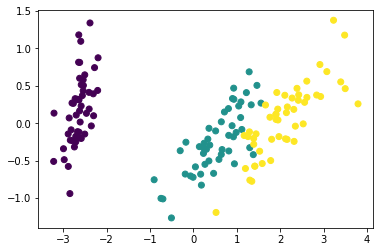

In [ ]:
plt.scatter(x_2d_lda[:,0] ,x_2d_lda[:,1] ,c = iris.target)
plt.show()

plt.scatter(x_2d_pca[:,0] ,x_2d_pca[:,1] ,c = iris.target)
plt.show()